# Q1(a)

For a given distribution p(y|x), we usually estimate mean because mean gives us the expected value of y given a particular x i.e helping us realise the center value around which y is expected to be.

# Q1(b)

Coding Vanilla linear regression  
 Defining a loss function and minimising it.         
 Using Scipy

In [7]:
import numpy as np
from numpy import random

# setting up the parameters
n = 5000
x_m = 0
x_sd = 1
X = np.random.normal(x_m,x_sd,size=5000)

# Actual value
w_act = random.rand()

y_m = w_act*X
y_C = np.eye(n)
y = np.random.multivariate_normal(y_m,y_C)

w_est = (np.power(X.dot(X.T), -1))*((X.T).dot(y))

# now using the given definition y = w*x

from scipy.optimize import minimize # for minimizing loss function

def loss(w,X,y):
  J = 0
  for i in range(n):
    J += 0.5*(np.power((w*X[i] - y[i]),2))
  return J

initial_parameters=1
result = minimize(loss, initial_parameters, args=(X,y), method='L-BFGS-B') # in method scipy didn't even allow usingm minimize instead use this lbfgs... , lol
w_est=result.x


print("Actual value of our parameter is : " , w_act)
print("Estimated value of our parameter using MSE is : " , w_est[0])
print("Estimated value of our parameter using Scipy: ",w_est[0])

Actual value of our parameter is :  0.8555429599763588
Estimated value of our parameter using MSE is :  0.8877652197263677
Estimated value of our parameter using Scipy:  0.8877652197263677


Sigma is utilised in generating the dataset and not in minimising the loss function . So, parametrising sigma won't be of any use here.

# Q1(C)

In [8]:
def log_likelihood_poisson(w,X,y):
  L=0
  for i in range(1000):
    c=np.exp(w[0]+w[1]*X[i])
    p=c-y[i]*(np.log(c))
    L+=p
  return L

# Generating a dataset

n = 5000
X=np.random.randn(n)
w_0=random.rand()
w_1=random.rand()
print("True value of parameters : ",w_0,",",w_1)
lambda_i=np.exp(w_0+w_1*X)
y=np.random.poisson(lambda_i)


initial_parameters=np.array([1,1]) # let's say
result = minimize(log_likelihood_poisson, initial_parameters, args=(X,y), method='L-BFGS-B')
estimated__w=result.x
print("Estimated value of parameters using Scipy : ",estimated__w[0], ",",estimated__w[1])

True value of parameters :  0.38181477772351413 , 0.817360185216536
Estimated value of parameters using Scipy :  0.414549292356375 , 0.8141993387729514


# Q2

Approach is plain & simple. Break down the problem into several parts which include calculating errors, finding the distribution etc. and then simply code ya!

In [11]:
from google.colab import files
for uploaded in range(6):
  uploaded = files.upload()


Saving test_set_A.csv to test_set_A (2).csv


Saving test_set_B.csv to test_set_B.csv


Saving test_set_C.csv to test_set_C.csv


Saving train_set_A.csv to train_set_A.csv


Saving train_set_B.csv to train_set_B.csv


Saving train_set_C.csv to train_set_C.csv


In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [51]:
trainA = pd.read_csv('/content/train_set_A.csv')
trainB = pd.read_csv('/content/train_set_B.csv')
trainC = pd.read_csv('/content/train_set_C.csv')
testA = pd.read_csv('/content/test_set_A.csv')
testB = pd.read_csv('/content/test_set_B.csv')
testC = pd.read_csv('/content/test_set_C.csv')

In [52]:
x_trainA, y_trainA = trainA[['x']], trainA['y']
x_trainB, y_trainB = trainB[['x']], trainB['y']
x_trainC, y_trainC = trainC[['x']], trainC['y']
x_testA, y_testA = testA[['x']], testA['y']
x_testB, y_testB = testB[['x']], testB['y']
x_testC, y_testC = testC[['x']], testC['y']


In [53]:
modelA = LinearRegression().fit(x_trainA, y_trainA)
modelB = LinearRegression().fit(x_trainB, y_trainB)
modelC = LinearRegression().fit(x_trainC, y_trainC)

The approach is to see which training & testing dataset pair has the least MSE.

In [54]:
mseAA= mean_squared_error(y_testA, modelA.predict(x_testA))
mseAB= mean_squared_error(y_testB, modelA.predict(x_testA))
mseAC= mean_squared_error(y_testC, modelA.predict(x_testA))

mseBA = mean_squared_error(y_testA, modelB.predict(x_testB))
mseBB = mean_squared_error(y_testB, modelB.predict(x_testB))
mseBC = mean_squared_error(y_testC, modelB.predict(x_testB))

mseCA = mean_squared_error(y_testA, modelC.predict(x_testC))
mseCB = mean_squared_error(y_testB, modelC.predict(x_testC))
mseCC = mean_squared_error(y_testC, modelC.predict(x_testC))

Printing the mean square error for each of the models A,B,C on each of the three testing dataset A,B,C.

In [55]:
print("Mean Squared Error for Model A on Test Set A : ", mseAA)
print("Mean Squared Error  for Model A on Test Set B : ", mseAB)
print("Mean Squared Error for Model A on Test Set C : ", mseAC)

print("Mean Squared Error for Model B on Test Set A : ", mseBA)
print("Mean Squared Error for Model B on Test Set B : ", mseBB)
print("Mean Squared Error for Model B on Test Set C : ", mseBC)

print("Mean Squared Error for Model C on Test Set A : ", mseCA)
print("Mean Squared Error for Model C on Test Set B : ", mseCB)
print("Mean Squared Error for Model C on Test Set C : ", mseCC)

Mean Squared Error for Model A on Test Set A :  22.25770734371434
Mean Squared Error  for Model A on Test Set B :  2.5616550522775925
Mean Squared Error for Model A on Test Set C :  0.062457236803248974
Mean Squared Error for Model B on Test Set A :  32.73219379378818
Mean Squared Error for Model B on Test Set B :  1.9577195262268569e-25
Mean Squared Error for Model B on Test Set C :  2.6140814129669656
Mean Squared Error for Model C on Test Set A :  16.15674668223636
Mean Squared Error for Model C on Test Set B :  15.774197648432851
Mean Squared Error for Model C on Test Set C :  5.699794881410673


Finding the error

In [56]:
errors=np.array([mseAA,mseAB,mseAC,mseBA,mseBB,mseBC,mseCA,mseCB,mseCC])
min_error=np.min(errors)
print("Minimum error : ",min_error)


Minimum error :  1.9577195262268569e-25


This corresponds to the training and testing set B.

Thus, it's training and testing set B that are from the actual distribution.

In [58]:
errorAA = np.power((y_testA - modelA.predict(x_testA)),2)
errorAB = np.power((y_testB - modelA.predict(x_testB)),2)
errorAC = np.power((y_testC - modelA.predict(x_testC)),2)

errorBA = np.power((y_testA - modelB.predict(x_testA)),2)
errorBB = np.power((y_testB - modelB.predict(x_testB)),2)
errorBC = np.power((y_testC - modelB.predict(x_testC)),2)

errorCA = np.power((y_testA - modelC.predict(x_testA)),2)
errorCB = np.power((y_testB - modelC.predict(x_testB)),2)
errorCC = np.power((y_testC - modelC.predict(x_testC)),2)


Plotting errors and their distribution

MODEL A

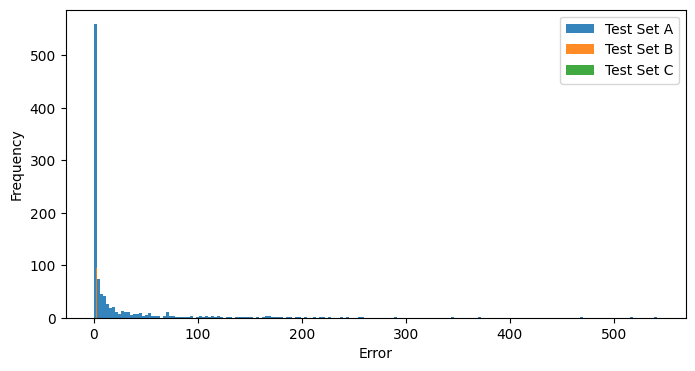

In [59]:
plt.figure(figsize=(8, 4))
plt.hist(errorAA, bins='auto', alpha=0.9, label='Test Set A')
plt.hist(errorAB, bins='auto', alpha=0.9, label='Test Set B')
plt.hist(errorAC, bins='auto', alpha=0.9, label='Test Set C')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [60]:
error_distributionAA = np.mean(errorAA), np.std(errorAA)
error_distributionAB = np.mean(errorAB), np.std(errorAB)
error_distributionAC = np.mean(errorAC), np.std(errorAC)

In [61]:
print("Error Distribution for MODEL A on Test Set A: Mean =", error_distributionAA[0], "Standard Deviation =", error_distributionAA[1])
print("Error Distribution for MODEL A on Test Set B: Mean =", error_distributionAB[0], "Standard Deviation =", error_distributionAB[1])
print("Error Distribution for MODEL A on Test Set C: Mean =", error_distributionAC[0], "Standard Deviation =", error_distributionAC[1])

Error Distribution for MODEL A on Test Set A: Mean = 22.25770734371434 Standard Deviation = 53.96589716508258
Error Distribution for MODEL A on Test Set B: Mean = 2.5616550522775925 Standard Deviation = 0.0022966488099699024
Error Distribution for MODEL A on Test Set C: Mean = 0.062457236803248974 Standard Deviation = 0.08652385376675549


MODEL B


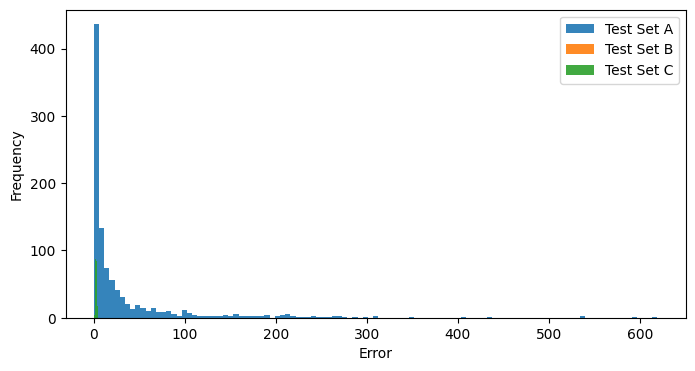

In [62]:
plt.figure(figsize=(8, 4))
plt.hist(errorBA, bins='auto', alpha=0.9, label='Test Set A')
plt.hist(errorBB, bins='auto', alpha=0.9, label='Test Set B')
plt.hist(errorBC, bins='auto', alpha=0.9, label='Test Set C')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [63]:
error_distributionBA = np.mean(errorBA), np.std(errorBA)
error_distributionBB = np.mean(errorBB), np.std(errorBB)
error_distributionBC = np.mean(errorBC), np.std(errorBC)

In [64]:
print("Error Distribution for MODEL B on Test Set A: Mean =", error_distributionBA[0], "Standard Deviation =", error_distributionBA[1])
print("Error Distribution for MODEL B on Test Set B: Mean =", error_distributionBB[0], "Standard Deviation =", error_distributionBB[1])
print("Error Distribution for MODEL B on Test Set C: Mean =", error_distributionBC[0], "Standard Deviation =", error_distributionBC[1])

Error Distribution for MODEL B on Test Set A: Mean = 32.73219379378818 Standard Deviation = 65.61751153849882
Error Distribution for MODEL B on Test Set B: Mean = 1.9577195262268569e-25 Standard Deviation = 1.892899978318431e-25
Error Distribution for MODEL B on Test Set C: Mean = 2.6140814129669656 Standard Deviation = 0.8034601498911891


MODEL C

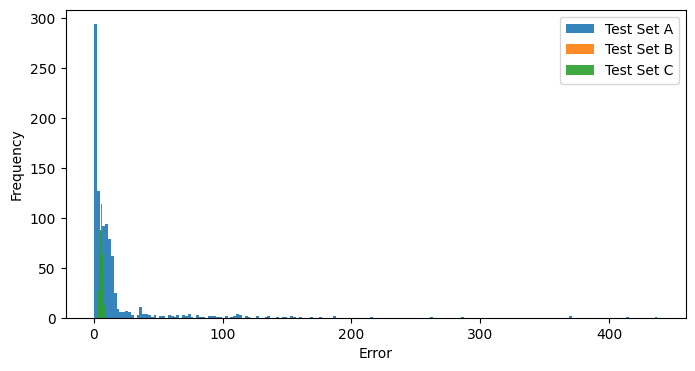

In [65]:
plt.figure(figsize=(8, 4))
plt.hist(errorCA, bins='auto', alpha=0.9, label='Test Set A')
plt.hist(errorCB, bins='auto', alpha=0.9, label='Test Set B')
plt.hist(errorCC, bins='auto', alpha=0.9, label='Test Set C')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [66]:
error_distributionCA = np.mean(errorCA), np.std(errorCA)
error_distributionCB = np.mean(errorCB), np.std(errorCB)
error_distributionCC = np.mean(errorCC), np.std(errorCC)

In [67]:
print("Error Distribution for MODEL C on Test Set A: Mean =", error_distributionCA[0], "Standard Deviation =", error_distributionCA[1])
print("Error Distribution for MODEL C on Test Set B: Mean =", error_distributionCB[0], "Standard Deviation =", error_distributionCB[1])
print("Error Distribution for MODEL C on Test Set C: Mean =", error_distributionCC[0], "Standard Deviation =", error_distributionCC[1])

Error Distribution for MODEL C on Test Set A: Mean = 16.15674668223636 Standard Deviation = 38.162560581973146
Error Distribution for MODEL C on Test Set B: Mean = 15.774197648432851 Standard Deviation = 0.03993390753228745
Error Distribution for MODEL C on Test Set C: Mean = 5.699794881410673 Standard Deviation = 1.1902720177778146


# Q4

(a) Here, both type of models might converge. Depending on the type of data, however, the flexible model might overfit while the inflexible model might underfit based on the bias-variance tradeoff. An inflexible model like linear regression when applied on a distribution with linear trend in the data, it will capture the data well whereas a flexible model might lead to overfitting.
  For a flexible model, we usually have high variance and low bias. High variance will occur here if there is a very non-linear relationship between predictor and the outcome.        
          
      
(b) Here an inflexible model might converge better. Number of observations is small implies the risk of overfitting is high with a flexible model. Alsp, the number of predictors is extremely large, so that increases the risk because we have noise in the data. Thus inflexible model is better and could weakly capture the trend. Inflexible model implies lower variance and high number of predictors implies the possibility of a complex relationship between response and predictors so we might have low bias. In case there is simple relation, we can expect higher bias.

(c) A flexible model is better since it can capture the non-linear relationship in a much better way. Also, in terms of bias-variance tradeoff, a highly flexible model implies lower bias & higher variance. It is very well expected that the inflexible model might overfit the data.

